In [11]:
# Step 1: Import libraries
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [2]:
# Load penguins dataset
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
print(penguins['species'].unique())
print(penguins['island'].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']


In [4]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
penguins = penguins.dropna().copy()

In [4]:
# Encoding
le_species = LabelEncoder()
penguins["species"] = le_species.fit_transform(penguins["species"])


le_island = LabelEncoder()
penguins["island"] = le_island.fit_transform(penguins["island"])

le_sex = LabelEncoder()
penguins["sex"] = le_sex.fit_transform(penguins["sex"])

In [7]:
le_species.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
X = penguins.drop("species", axis=1)
y = penguins["species"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9855072463768116

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.94      1.00      0.97        16
           2       1.00      0.95      0.98        21

    accuracy                           0.99        69
   macro avg       0.98      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



In [12]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[32  0  0]
 [ 0 16  0]
 [ 0  1 20]]


In [63]:
dt.classes_

array([0, 1, 2])

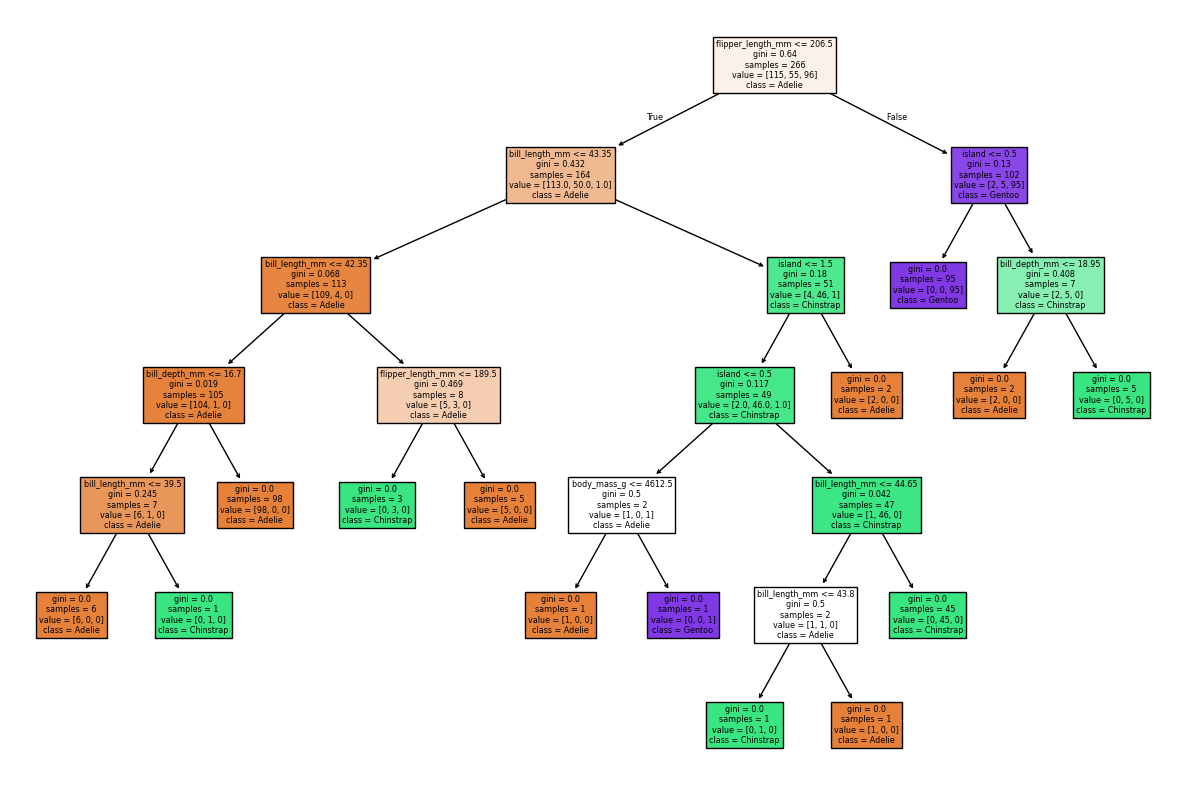

In [71]:
plt.figure(figsize=(15, 10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=[str(c) for c in le_species.classes_],
    filled=True
)
plt.show()
